In [4]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [5]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
# conversion of array to daatframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# adding the target variable to the data frame 
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Exploratory Data Analysis

In [10]:
df.groupby('target')['target'].count()

target
0    50
1    50
2    50
Name: target, dtype: int64

In [12]:
df['flowername']  =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flowername
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
df1 = df[df['target'] == 0]
df2 = df[df['target'] == 1]
df3 = df[df['target'] == 2]


# Data Visulization

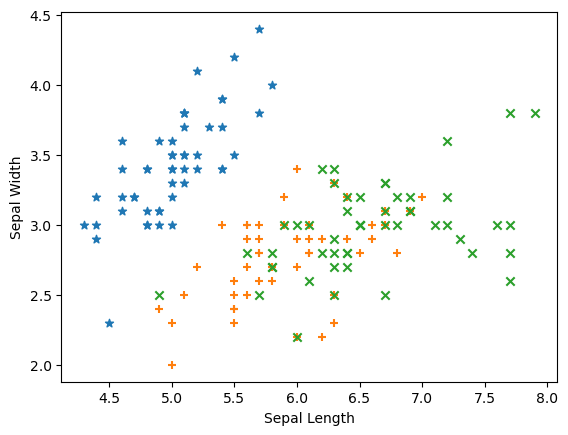

In [14]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], marker="*")
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], marker="+")
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], marker="x")

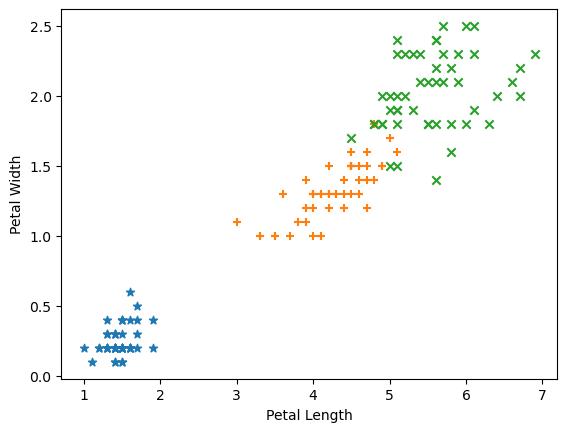

In [15]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], marker="*")
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], marker="+")
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], marker="x")


# Creating Training data, Testing data and Model

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['target', 'flowername'], axis=1), df.target, test_size=0.4)

In [18]:
from sklearn.svm import SVC
model  = SVC()

In [19]:
model.fit(x_train, y_train)

SVC()

In [20]:
model.predict(x_test)

array([1, 2, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0,
       2, 2, 0, 1, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2,
       2, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 2, 1, 1, 2])

In [21]:
model.score(x_test, y_test)

0.9666666666666667